# Data visualisation task 

**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html) 

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Load data
cars = pd.read_csv('Cars93.csv')

### 1. Boxplot

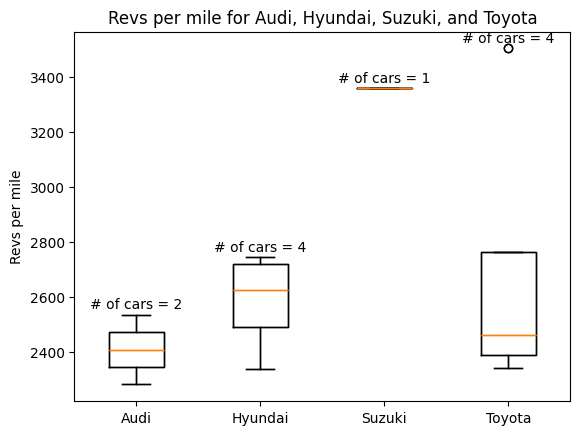

In [3]:
# Create boxplots to show revs per mile for the Audi, Hyundai, Suzuki, and Toyota car manufacturers

# Create datasets for each manufacturer
data_audi = cars[cars['Manufacturer'] == 'Audi']['Rev.per.mile']
data_hyundai = cars[cars['Manufacturer'] == 'Hyundai']['Rev.per.mile']
data_suzuki = cars[cars['Manufacturer'] == 'Suzuki']['Rev.per.mile']
data_toyota = cars[cars['Manufacturer'] == 'Toyota']['Rev.per.mile']

# Combine all manufacturer data to one list
car_data = [data_audi, data_hyundai, data_suzuki, data_toyota]

# ax will be a 2d array of 4 axes objects
fig, ax = plt.subplots()
boxplot = ax.boxplot(car_data)

# Include the count of data points for each manufacturer
for i, d in enumerate(car_data):
    count = len(d)
    x_position = boxplot['boxes'][i].get_xdata()[0] + (boxplot['boxes'][i].get_xdata()[1] - boxplot['boxes'][i].get_xdata()[0]) / 2
    y_position = np.max(d) + 10  # Get the y position of the data
    ax.text(x_position, y_position, f'# of cars = {count}', ha = 'center', va = 'bottom')  # Add the count to the plot

# Create a boxplot with mulitple boxes side by side
plt.boxplot(car_data)

# Add title and labels
plt.title('Revs per mile for Audi, Hyundai, Suzuki, and Toyota')
plt.xticks([1, 2, 3, 4], ['Audi', 'Hyundai', 'Suzuki', 'Toyota'])
plt.ylabel('Revs per mile')

plt.show()

**Boxplot question:**  
Which of these manufacturers has the car with the highest revs per mile?


**Boxplot answer:**<br><br>
Toyota has the car with the highest revs per mile but the data seems flawed. <br><br>
The RPM (Revs Per Minute) data is higher than the Rev.per.mile data implying that the speed at which the vehicles are travelling is very high.<br><br>
For example the Toyota data shows the Previa van has RPM = 5000 and a Rev.per.minute = 2515. This implies a speed of 120 mph which would be very unusual<br><br>
If the orange lines are the average/mean lines then they are also flawed as the average Rev.per.minute for Toyota vehicles is 2691 but the boxplot shows closer to 2500<br><br>
Hopefully the exercise is correct technically but the data does not look reliable at all


### 2. Histogram

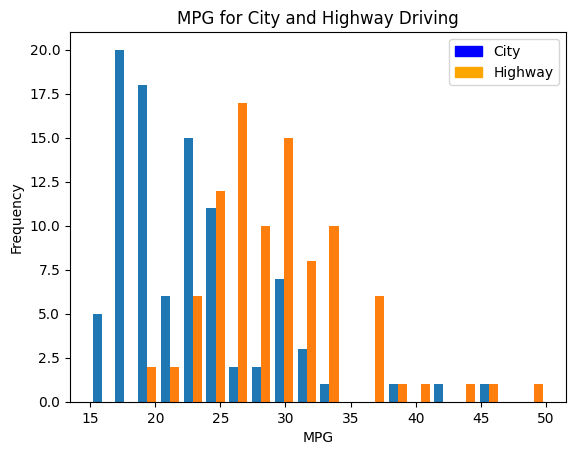

In [4]:
# Histogram of MPG in the city and on the highway
# Create data sets for city and highway MPG
city_mpg = cars['MPG.city']
highway_mpg = cars['MPG.highway']

# Create a combined data set
mpg_data = [city_mpg, highway_mpg]

# Create a histogram
plt.hist(mpg_data, bins = 20)

# Add title and labels
plt.title('MPG for City and Highway Driving')
plt.xlabel('MPG')
plt.ylabel('Frequency')
leg_city_mpg = mpatches.Patch(color = 'blue', label = 'City')   # Create a City proxy artist for the legend
leg_highway_mpg = mpatches.Patch(color = 'orange', label = 'Highway')   # Create a Highway proxy artist for the legend
plt.legend(handles = [leg_city_mpg, leg_highway_mpg])   # Pass the proxy artists to the legend

plt.show()

**Histogram question:**  
Is it generally more fuel efficient to drive in the city or on the highway?

**Histogram answer:**<br><br>
According to the chart it is more fuel efficient to drive on the highway - usually as there is much less stopping starting which uses a greater amount of fuel than a constant higher speed

### 3. Lineplot

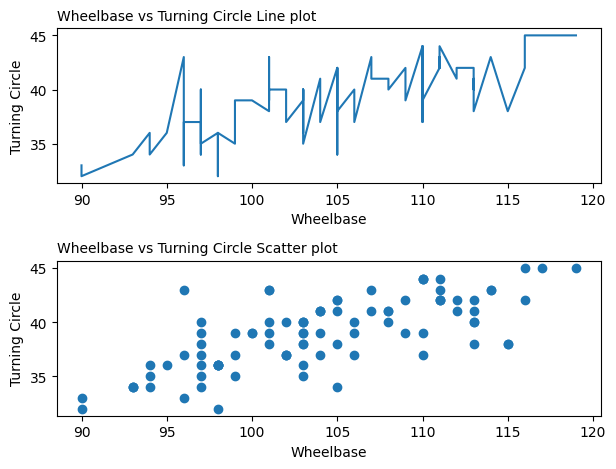

In [5]:
# Create a lineplot for Wheelbase vs turning circle

fig, ax = plt.subplots(2)

cars_ascending = cars.sort_values(by = 'Wheelbase')   # Sort the data by wheelbase

# Create a line plot and add title and labels
ax[0].plot(cars_ascending['Wheelbase'], cars_ascending['Turn.circle'])
ax[0].set_title('Wheelbase vs Turning Circle Line plot', loc='left', fontsize=10)
ax[0].set_xlabel('Wheelbase')
ax[0].set_ylabel('Turning Circle')

# Create a scatter plot and add title and labels
ax[1].scatter(cars['Wheelbase'], cars['Turn.circle'])
ax[1].set_title('Wheelbase vs Turning Circle Scatter plot', loc='left', fontsize=10)
ax[1].set_xlabel('Wheelbase')
ax[1].set_ylabel('Turning Circle')

plt.tight_layout()

plt.show()

**Lineplot question:**  
What is this relationship? What happens when the wheelbase gets larger?


**Lineplot answer:**  <br><br>
A lineplot is not the best option for visualising this data even when sorting into an ascending order of wheelbase size as the varying direction of the lineplot can be confusing.<br><br>
A better alternative would be a scatter plot as it is easier to infer a trend in the data whilst discounting outliers<br><br>
The plots tend to suggest that the longer the wheelbase the larger the turning circle which is logical with outliers being explained by possible mechanical limitations of the relevant vehicle

### 4. Barplot

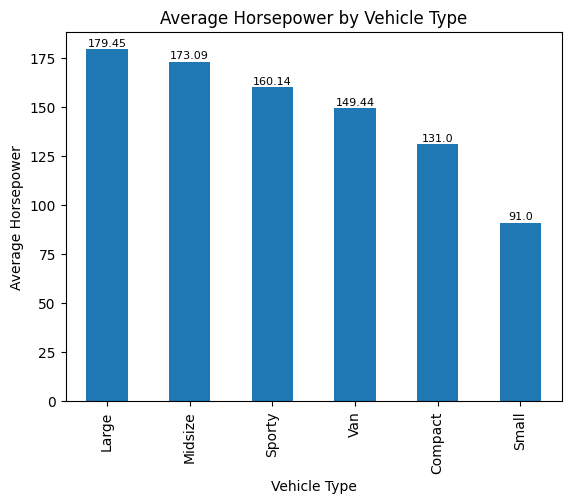

In [6]:
# Create a barplot to show mean horsepower per vehicle type

type_horsepower = cars[['Type', 'Horsepower']]  # Create a dataframe from the cars data with only the type and horsepower columns
average_horsepower = type_horsepower.groupby('Type')['Horsepower'].mean()  # Calculate the average horsepower for each vehicle type
average_horsepower_sorted = average_horsepower.sort_values(ascending = False)  # Sort the average horsepower in descending order

# Create a barplot
ax = average_horsepower_sorted.plot(kind = 'bar')

# Add title and labels
plt.title('Average Horsepower by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Horsepower')

# Add average values as labels on top of the bars
for i, v in enumerate(average_horsepower_sorted):
    ax.text(i, v + 0.5, round(v, 2), ha='center', va='bottom', fontsize=8)  # Adjust 0.5 to space the label above the bar

plt.show()

**Barplot question:**  
Does a larger car mean more horsepower?



**Barplot answer:**<br><br>
There does appear to be a positive correlation between size of vehicle and average horsepower